In [1]:
#Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Read Dataset
dataset = pd.read_csv('./wine.csv',delimiter=',',header=0)
dataset

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


## Información mutua
Para el cómputo de la información mutua dividiremos los valores que toman los datos en cada atributo en 10 cajas distintas.

In [2]:
def mutualinfo(atrib,clase,dataset,numclases):
    MI = 0
    bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    labels = [0,1,2,3,4,5,6,7,8,9]
    df = pd.DataFrame()
    df['normal'] = (dataset[atrib]-dataset[atrib].min())
    df['normal'] = df['normal']/df['normal'].max()
    df['binned'] = pd.cut(df['normal'], bins=bins, labels=labels)
    df['clase'] = dataset[clase]
    
    T = dataset[clase].count()
    for ci in range(1,numclases+1):
        pci = df[df['clase'] == ci]['binned'].count()/T
        for ai in labels:
            pai = df[df['binned'] == ai]['binned'].count()/T
            pcai = (df[df['clase'] == ci]['binned'].values == ai).sum()/T
            if pcai > 0:
                entropy = (pcai) * np.log((pcai)/(pai*pci))
                MI = MI + entropy
    return MI

In [3]:
good = []
for atrib in dataset:
    mi = mutualinfo(atrib,'Wine',dataset,3)
    if mi > 0.53 and atrib != 'Wine':
        good.append(atrib)
    print(atrib, ':= ', mi)
good

Wine :=  0.7200242847822809
Alcohol :=  0.45375779442006337
Malic.acid :=  0.31794115866503514
Ash :=  0.11299081711921698
Acl :=  0.24197567541200668
Mg :=  0.252505275139712
Phenols :=  0.41314973511917674
Flavanoids :=  0.6677363731879943
Nonflavanoid.phenols :=  0.20230732499729445
Proanth :=  0.2440739251572243
Color.int :=  0.5248166704475082
Hue :=  0.43443137342682925
OD :=  0.5309899942010472
Proline :=  0.5384637089003323


['Flavanoids', 'OD', 'Proline']

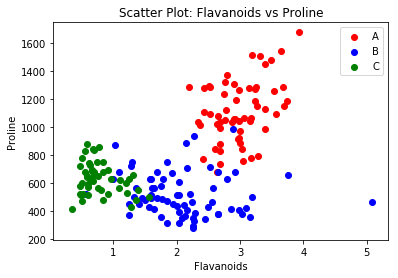

In [4]:
### Scatter Plot Flavanoids vs Proline

plt.figure()
plt.scatter(dataset[dataset.Wine==1].Flavanoids,dataset[dataset.Wine==1].Proline, color='red')
plt.scatter(dataset[dataset.Wine==2].Flavanoids,dataset[dataset.Wine==2].Proline, color='blue')
plt.scatter(dataset[dataset.Wine==3].Flavanoids,dataset[dataset.Wine==3].Proline, color='green')
plt.title('Scatter Plot: Flavanoids vs Proline')
plt.xlabel('Flavanoids')
plt.ylabel('Proline')
plt.legend(['A','B','C'])
plt.show()

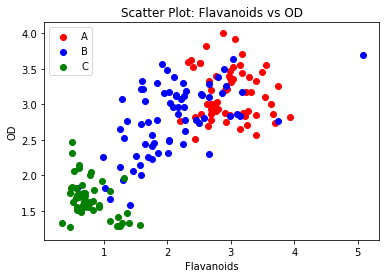

In [5]:
### Scatter Plot Flavanoids vs OD

plt.figure()
plt.scatter(dataset[dataset.Wine==1].Flavanoids,dataset[dataset.Wine==1].OD, color='red')
plt.scatter(dataset[dataset.Wine==2].Flavanoids,dataset[dataset.Wine==2].OD, color='blue')
plt.scatter(dataset[dataset.Wine==3].Flavanoids,dataset[dataset.Wine==3].OD, color='green')
plt.title('Scatter Plot: Flavanoids vs OD')
plt.xlabel('Flavanoids')
plt.ylabel('OD')
plt.legend(['A','B','C'])
plt.show()

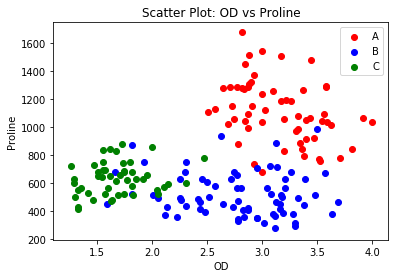

In [6]:
### Scatter Plot OD vs Proline

plt.figure()
plt.scatter(dataset[dataset.Wine==1].OD,dataset[dataset.Wine==1].Proline, color='red')
plt.scatter(dataset[dataset.Wine==2].OD,dataset[dataset.Wine==2].Proline, color='blue')
plt.scatter(dataset[dataset.Wine==3].OD,dataset[dataset.Wine==3].Proline, color='green')
plt.title('Scatter Plot: OD vs Proline')
plt.xlabel('OD')
plt.ylabel('Proline')
plt.legend(['A','B','C'])
plt.show()

## Chi-Square
De nuevo consideramos 10 cajas por atributo

In [7]:
def chisq(atrib,clase,dataset,numclases):
    C = 0
    bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    labels = [0,1,2,3,4,5,6,7,8,9]
    df = pd.DataFrame()
    df['normal'] = (dataset[atrib]-dataset[atrib].min())
    df['normal'] = df['normal']/df['normal'].max()
    df['binned'] = pd.cut(df['normal'], bins=bins, labels=labels)
    df['clase'] = dataset[clase]
    
    T = dataset[clase].count()
    for ci in range(1,numclases+1):
        pci = df[df['clase'] == ci]['binned'].count()/T
        for ai in labels:
            pai = df[df['binned'] == ai]['binned'].count()/T
            pcai = (df[df['clase'] == ci]['binned'].values == ai).sum()/T
            if pcai > 0:
                entropy = (pai*pci) * (((pcai-(pai*pci))/(pai*pci))**2)
                C = C + entropy
    return C

In [8]:
good = []
for atrib in dataset:
    c = chisq(atrib,'Wine',dataset,3)
    if c > 0.7 and atrib != 'Wine':
        good.append(atrib)
    print(atrib, ':= ', c)
good

Wine :=  0.89474182552708
Alcohol :=  0.5637012525520861
Malic.acid :=  0.5183431879435374
Ash :=  0.15559841415608244
Acl :=  0.3309871651917015
Mg :=  0.30672596502155525
Phenols :=  0.5435301025755033
Flavanoids :=  0.8816843249559941
Nonflavanoid.phenols :=  0.29820261956258337
Proanth :=  0.335979813241159
Color.int :=  0.7268494599873179
Hue :=  0.5201574155033654
OD :=  0.6193835327178725
Proline :=  0.6799429712647511


['Flavanoids', 'Color.int']

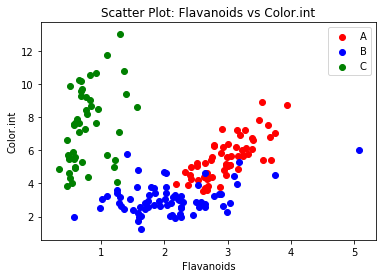

In [9]:
### Scatter Plot Flavanoids vs Color.int

plt.figure()
plt.scatter(dataset[dataset.Wine==1].Flavanoids,dataset[dataset.Wine==1]['Color.int'], color='red')
plt.scatter(dataset[dataset.Wine==2].Flavanoids,dataset[dataset.Wine==2]['Color.int'], color='blue')
plt.scatter(dataset[dataset.Wine==3].Flavanoids,dataset[dataset.Wine==3]['Color.int'], color='green')
plt.title('Scatter Plot: Flavanoids vs Color.int')
plt.xlabel('Flavanoids')
plt.ylabel('Color.int')
plt.legend(['A','B','C'])
plt.show()

## PCA

Para el analisis de componentes principales construiremos una versión normalizada del dataset y compararemos los resultados que las dos versiones obtienen.

La idea es descomponer la base de datos como si fuera una matriz usando la descomposicion SVD, usar los autovalores para analizar la varianza que mantiene cada autovector y guardar los tres autovectores más significativos para su uso en la regresión logística.

In [10]:
pcadf = dataset.drop(['Wine'], axis=1)
pcadf.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
npcadf = pcadf.apply(lambda x: x if np.std(x) == 0 else zscore(x))
npcadf.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Para analizar las componentes principales del dataset original empezamos por la descomposición SVD:

In [12]:
a = pcadf.to_numpy()
u, s, vh = np.linalg.svd(a, full_matrices=False)

Vamos a ver cuanta varianza preserva cada uno de los autovectores, lo hacemos con un grafico que muestra el valor de sus autovalores correspondientes:

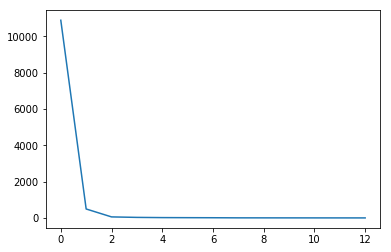

In [13]:
plt.plot(s)

Calculamos ahora cuantos autovalores hacen falta para guardar el 90% de la varianza:

In [14]:
def varpreservada(ratio,autovalores):
    n = 0
    t = sum(autovalores)
    s = 0
    while s < (ratio*t):
        n = n+1
        s = s + autovalores.item(n-1)
    return n , s/t

varpreservada(0.9,s)

(1, 0.9441508692210704)

Con un solo autovector tenemos representada el 94.4% de la varianza.

Vamos a representar en un grafico los elementos de acuerdo a los dos autovectores mas significativos:

In [15]:
pcadf = pd.DataFrame()
pcadf['Wine'] = list(dataset['Wine'])
pcadf['f1'] = list(u[:,0])
pcadf['f2'] = list(u[:,1])
pcadf

,Wine,f1,f2
0,1,-0.098539,-0.001960
1,1,-0.096873,0.049256
2,1,-0.109212,0.076163
3,1,-0.136244,0.124186
4,1,-0.068354,-0.066000
5,1,-0.133493,0.119825
6,1,-0.118728,0.112760
7,1,-0.119455,0.064139
8,1,-0.096393,0.052151
9,1,-0.096408,0.049351


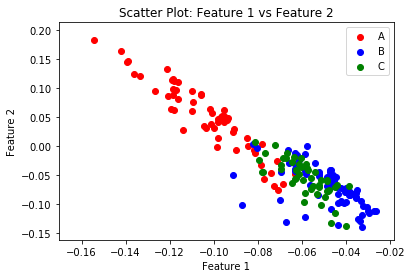

In [16]:
### Scatter Plot Feature 1 vs Feature 2

plt.figure()
plt.scatter(pcadf[pcadf.Wine==1]['f1'],pcadf[pcadf.Wine==1]['f2'], color='red')
plt.scatter(pcadf[pcadf.Wine==2]['f1'],pcadf[pcadf.Wine==2]['f2'], color='blue')
plt.scatter(pcadf[pcadf.Wine==3]['f1'],pcadf[pcadf.Wine==3]['f2'], color='green')
plt.title('Scatter Plot: Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['A','B','C'])
plt.show()

A penas podemos ver una separacion entre las clases, veamos ahora como se comporta el analisis de componentes principales aplicado al dataset normalizado:

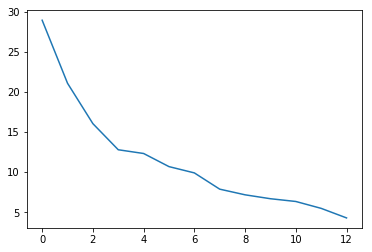

In [17]:
a = npcadf.to_numpy()
u, s, vh = np.linalg.svd(a, full_matrices=False)
plt.plot(s)

In [18]:
varpreservada(0.9,s)

(11, 0.9346935572396352)

Podemos ver que ahora hacen falta 11 proyecciones para preservar el 90% de la varianza.

In [19]:
pca = pd.DataFrame()
pca['Wine'] = list(dataset['Wine'])
pca['f1'] = list(u[:,0])
pca['f2'] = list(u[:,1])
pca['f3'] = list(u[:,2])
pca

,Wine,f1,f2,f3
0,1,-0.114600,0.068468,-0.010330
1,1,-0.076341,-0.015814,-0.126308
2,1,-0.086958,0.048911,0.061259
3,1,-0.129813,0.130744,-0.010982
4,1,-0.034860,0.041259,0.126323
5,1,-0.105392,0.100672,-0.039230
6,1,-0.084621,0.055727,-0.060902
7,1,-0.071157,0.076318,0.009118
8,1,-0.086755,0.043547,-0.110384
9,1,-0.095143,0.037446,-0.061348


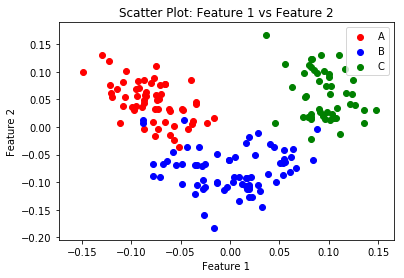

In [20]:
### Scatter Plot Feature 1 vs Feature 2

plt.figure()
plt.scatter(pca[pca.Wine==1]['f1'],pca[pca.Wine==1]['f2'], color='red')
plt.scatter(pca[pca.Wine==2]['f1'],pca[pca.Wine==2]['f2'], color='blue')
plt.scatter(pca[pca.Wine==3]['f1'],pca[pca.Wine==3]['f2'], color='green')
plt.title('Scatter Plot: Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['A','B','C'])
plt.show()

Con el dataset normalizado obtenemos una separación mucho mas clara entre las tres clases. El problema de PCA es que es susceptible al orden de magnitud de los valores que toman los distintos atributos. Por eso, si no normalizamos antes de hacer la descomposición SVD obtenemos autovectores que se centraran en las columnas con datos más grandes en valor absoluto.

El siguiente paso será realizar el analisis de discriminante lineal (LDA)

## LDA

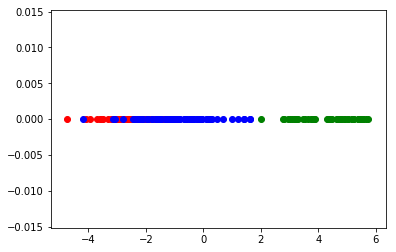

In [75]:
var = dataset.iloc[:, 1:13].values
classes = dataset.iloc[:, 0].values

lda = LDA(n_components=1)
X = lda.fit_transform(var,classes)

plt.figure()
j = 0
for i in X:
    if y[j] == 1:
        plt.scatter(i[0],0,color= 'red')
    if y[j] == 2:
        plt.scatter(i[0],0,color= 'blue')
    if y[j] == 3:
        plt.scatter(i[0],0,color= 'green')
    j += 1


